Creating API Class

In [1]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from urllib.request import urlopen
%matplotlib inline


In [2]:
"""
A finance API class using the API from https://financialmodelingprep.com/
NOTE: You need to register on their website to obtain your own secret API key
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen

class FinanceAPI():
    """
    Core class
    """
    
    def __init__(self):
        """
        Initiates the object
        """
        self.key = ''
        self.key_registered = False
        pass
    
    def registerKey_(self,key):
        """
        Registers a secret API key to the object
        """
        assert type(key) is str,"Key must be a string"
        self.key = str(key)
        self.key_registered = True
    
    def __repr__(self):
        return ("This is a finance API class.\n")
    
    def profile_data_(self,symbol):
        """
        Pulls the metrics data from the API for the given ticker symbol
        Parameters
        ----------
        symbol : A ticker symbol (str) e.g. 'MSFT','FB','AAPL', or 'TWTR'
        Returns
        -------
        None. Updates the self.profile with the data. 
        """        
        if not self.key_registered:
            print("API key not registered yet.")
            return None
        
        url = "https://financialmodelingprep.com/api/v3/"+\
            "company/profile/"+str(symbol)+'?apikey='+self.key
        response = urlopen(url)
        data = response.read().decode("utf-8")
        self.profile = json.loads(data)
        
    def metrics_data_(self,symbol):
        """
        Pulls the metrics data from the API for the given ticker symbol
        Parameters
        ----------
        symbol : A ticker symbol (str) e.g. 'MSFT','FB','AAPL', or 'TWTR'
        Returns
        -------
        None. Updates the self.metrics with the data. 
        """
        if not self.key_registered:
            print("API key not registered yet.")
            return None
        
        url = "https://financialmodelingprep.com/api/v3/"+\
            "company-key-metrics/"+str(symbol)+'?apikey='+self.key
        response = urlopen(url)
        data = response.read().decode("utf-8")
        self.metrics = json.loads(data)
        
    def ratios_data_(self,symbol):
        """
        Pulls the ratios data from the API for the given ticker symbol
        Parameters
        ----------
        symbol : A ticker symbol (str) e.g. 'MSFT','FB','AAPL', or 'TWTR'
        Returns
        -------
        None. Updates the self.ratios with the data. 
        """
        if not self.key_registered:
            print("API key not registered yet.")
            return None
        
        url = "https://financialmodelingprep.com/api/v3/"+\
            "ratios/"+str(symbol)+'?apikey='+self.key
        response = urlopen(url)
        data = response.read().decode("utf-8")
        self.ratios = json.loads(data)
    
    def build_dict(self,symbol):
        """
        Builds a dictionary with a given ticker symbols
        
        Parameters
        ----------
        symbol : A ticker symbol (str) e.g. 'MSFT','FB','AAPL', or 'TWTR'
        Returns
        -------
        A dictionary with all the profile and metrics data pulled from the API
        """
        # Pull data
        if not self.key_registered:
            print("API key not registered yet.")
            return None
        
        self.profile_data_(symbol)
        self.metrics_data_(symbol)
        self.ratios_data_(symbol)
        # Empty dict
        data_dict = {}
        # Symbol
        data_dict['symbol']=symbol
        # Profile data
        for k in self.profile['profile'].keys():
            data_dict[k]=self.profile['profile'][k]
        # Metrics data
        for k in self.metrics['metrics'][0].keys():
            data_dict[k]=self.metrics['metrics'][0][k]
        # Ratios data
        c=[(k,v) for k,v in self.ratios[0].items()]
        for k in c[2:]:
            data_dict[k[0]]=k[1]

        return data_dict
    
    def available_data(self,data_type='profile'):
        """
        Prints a list of data items that are available
        
        Arguments
        ----------
        data_type: One of 'profile','metrics',or 'ratios'
        
        Returns
        --------
        None. Prints a list.
        """
        assert str(data_type) in ['profile','metrics','ratios'], \
        "Data type not recognized. Should be one of \'profile\',\'metrics\',or \'ratios\'"
        
        available_data = []
        if data_type=='profile':    
            for k in self.profile['profile'].keys():
                if self.profile['profile'][k] is not None:
                    available_data.append(k)
            print("Following data are available for profile")
            print("="*60)
            for d in available_data[:-1]:
                print(d,end=', ')
            print(available_data[-1],end='.')
        
        if data_type=='metrics':    
            for k in self.metrics['metrics'][0].keys():
                if self.metrics['metrics'][0][k] is not None:
                    available_data.append(k)
            print("Following data are available for metrics")
            print("="*60)
            for d in available_data[:-1]:
                print(d,end=', ')
            print(available_data[-1],end='.')
            
        if data_type=='ratios':    
            c=[(k,v) for k,v in self.ratios[0].items()]
            for k in c[2:]:
                if k[1] is not None:
                    available_data.append(k[0])
            print("Following data are available for ratios")
            print("="*60)
            for d in available_data[:-1]:
                print(d,end=', ')
            print(available_data[-1],end='.')
    
    def cols_numeric_(self):
        """
        Transforms columns to numeric (float) wherever applicable
        """
        for c in self.df.columns:
            try:
                self.df[c] = self.df[c].apply(float)
            except ValueError:
                pass
    
    def replace_None_(self):
        """
        Replaces NoneType data by np.nan in the DataFrame
        """
        self.df.fillna(value=pd.np.nan, inplace=True)
    
    def build_dataframe(self,lst):
        """
        Builds a DataFrame with a given list of ticker symbols
        
        Parameters
        ----------
        lst : A list of ticker symbols (str) 
            e.g. ['MSFT','FB','AAPL','TWTR']
        Returns
        -------
        A Pandas DataFrame with all the data pulled from the API, 
        indexed by the symbol (company)
        """
        if not self.key_registered:
            print("API key not registered yet.")
            return None
        
        data_companies = []
        for c in lst:
            data_companies.append(self.build_dict(c))
        # Build the DataFrame
        self.df = pd.DataFrame(data_companies)
        # Convert to numeric columns wherever applicable
        self.replace_None_()
        self.cols_numeric_()
        
        return self.df
    
    def bar_chart(self,var='price',**kwargs):
        """
        Plots a bar chart of the given variable
        
        Parameters
        ----------
        var : Name of the variable to be plotted (str)
            e.g. 'price', 'PE ratio', 'Book Value per Share'
        Returns
        -------
        None
        """
        plt.figure(figsize=(10,4))
        plt.title("{}".format(var),fontsize=18)
        plt.bar(x=self.df['companyName'],height=self.df[var],**kwargs)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.ylabel(var,fontsize=16)
        plt.show()
    
    def scatter(self,varX,varY,sizeZ=None,**kwargs):
        """
        Plots a scatter chart of the given variable pair,
        and (optionally) size the as per a third variable
        
        Parameters
        ----------
        varX : Name of the x-axis variable (str), e.g. 'price', 'PE ratio', 'Book Value per Share'
        varY : Name of the x-axis variable (str), e.g. 'price', 'PE ratio', 'Book Value per Share'
        sizeZ : Name of the variable (str) for sizing, e.g. 'price', 'PE ratio', 'Book Value per Share'
        Returns
        -------
        None
        """
        if sizeZ is not None:
            scale = 1000/(self.df[sizeZ].max()**2)
        plt.figure(figsize=(10,4))
        plt.title("{} vs. {}".format(varX,varY),fontsize=18)
        if sizeZ is not None:
            plt.scatter(x=self.df[varX],y=self.df[varY],s=scale*self.df[sizeZ]**2,**kwargs)
        else:
            plt.scatter(x=self.df[varX],y=self.df[varY],s=200,**kwargs)
        for i in (range(len(self.df))):
            plt.annotate(s=self.df['symbol'][i],
                         xy=(self.df[varX][i],
                             self.df[varY][i]))
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel(varX,fontsize=16)
        plt.ylabel(varY,fontsize=16)
        plt.show()
     
 


API Key

In [3]:
with open('API Key .txt') as f:
    key = f.read()

In [4]:
f = FinanceAPI()

In [5]:
print(f)

This is a finance API class.



 Registering the Key

In [6]:
f.registerKey_(key)


 Build the Dictionary

In [7]:
FUV_dict=f.build_dict('FUV')

In [59]:
df=f.build_dataframe(['TSLA','FUV', 'INVE', 'STKL', 'CPRX', 'APHA'])

<ipython-input-2-680d9dcf9dba>:193: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  self.df.fillna(value=pd.np.nan, inplace=True)


In [60]:
df.head()

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,changesPercentage,companyName,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,TSLA,1525.2400,0.580101,14461131.0,2.828942e+11,0.0,211.0-1794.99,24.4017,(+1.63%),Tesla Inc.,...,4.614833,-131.581636,105.706775,47.161484,47.161484,23.860429,4.614833,NaN,48.094311,17.138617
1,FUV,5.6898,0.019570,1071041.0,1.724021e+08,0.0,0.966-8.89,-0.0602,(-1.05%),Arcimoto Inc.,...,29.548682,-1.902637,-2.006780,-2.042533,-2.042533,10.404778,29.548682,NaN,-2.054856,3.835639
2,INVE,5.1000,1.448566,122882.0,9.014046e+07,0.0,2.11-7.04,-0.1400,(-2.67%),Identiv Inc.,...,1.204525,-87.649835,731.050435,236.264543,236.264543,316.194732,1.204525,-0.010329,27.319614,2.844554
3,STKL,4.7300,1.101538,769880.0,5.086831e+08,0.0,1.3-5.48,0.0100,(+0.21%),SunOpta Inc.,...,0.202128,-317.330317,-10.478605,24.522008,24.522008,255.093416,0.202128,0.028270,3.975359,1.878882
4,CPRX,4.9200,2.390387,1772623.0,5.088018e+08,0.0,2.55-7.67,-0.0900,(-1.80%),Catalyst Pharmaceuticals Inc.,...,4.216129,13.531988,NaN,NaN,NaN,-40.967568,4.216129,NaN,10.771148,4.922252


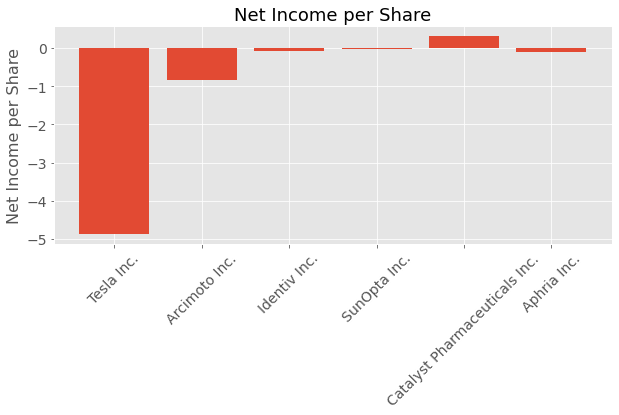

In [36]:
f.bar_chart('Net Income per Share')


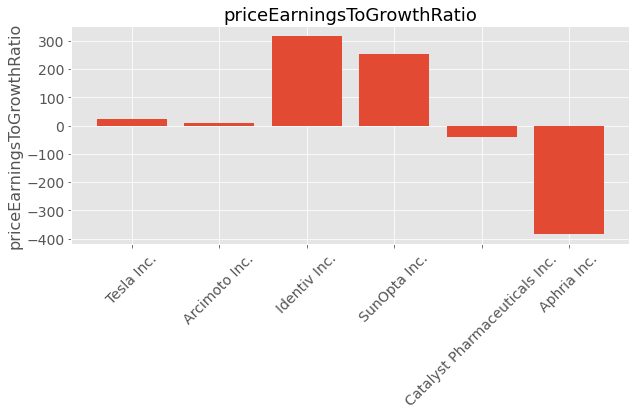

In [37]:
f.bar_chart('priceEarningsToGrowthRatio')

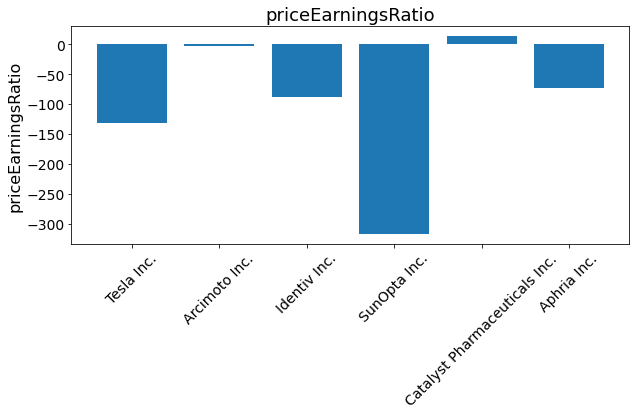

In [14]:
f.bar_chart('priceEarningsRatio')

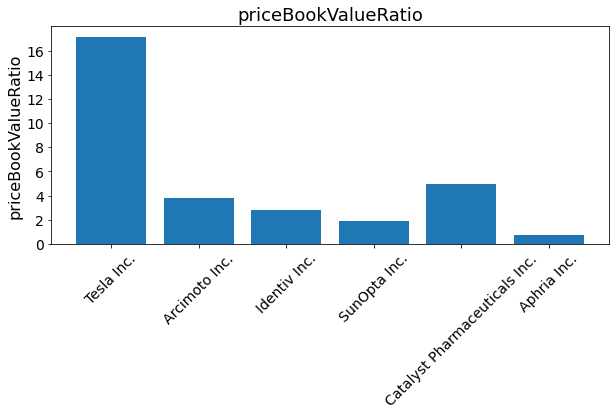

In [15]:
f.bar_chart('priceBookValueRatio')

    Other Charts

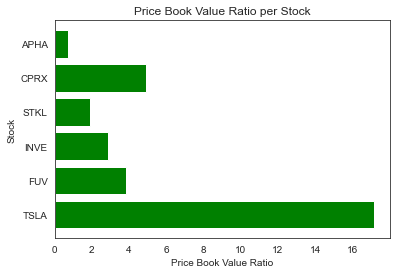

In [61]:
x = df.symbol
energy = df.priceBookValueRatio

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='green')
plt.ylabel("Stock")
plt.xlabel("Price Book Value Ratio")
plt.title("Price Book Value Ratio per Stock")

plt.yticks(x_pos, x)

plt.show()

Make a Scatter Plot

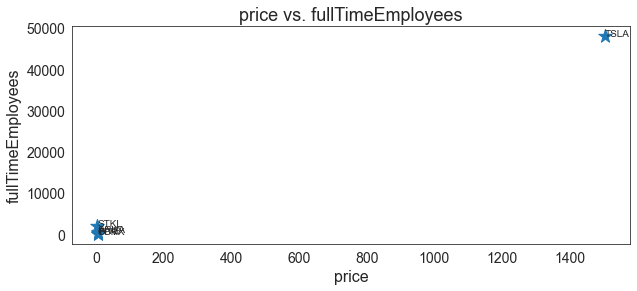

In [48]:
f.scatter('price', 'fullTimeEmployees', marker='*')

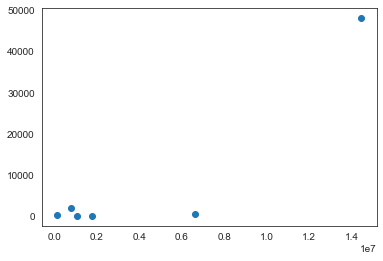

In [68]:
x=df.volAvg
y=df.fullTimeEmployees
fig, ax = plt.subplots()
ax.scatter(x,y)
plt.xlim(0,200,0,500)
plt.show()